# Présentation des GAN (Generative Adversarial Networks)

Ce notebook a pour but de présenter brièvement les GAN au lecteur pour comprendre rapidement le fonctionnement des modèles GAN

Les modèles GAN, ou *Generative Adversarial Networks*, sont une classe de modèles de réseaux neuronaux utilisés pour générer des données, comme des images, des vidéos ou même du texte. L'idée principale derrière les GAN est d'entraîner deux réseaux neuronaux en même temps : un générateur et un discriminateur.

## Générateur
Le générateur crée de nouvelles données. Son objectif est de générer des données qui ressemblent le plus possible à des données réelles.

## Discriminateur
Le discriminateur apprend à distinguer les données générées par le générateur des données réelles. Son but est de devenir de plus en plus précis dans sa capacité à discriminer entre les deux types de données.

Pendant l'entraînement, le générateur cherche à tromper le discriminateur en générant des données de plus en plus réalistes, tandis que le discriminateur essaie d'être de plus en plus précis pour distinguer les données générées des données réelles. Cette compétition entre les deux réseaux conduit à l'amélioration de la capacité du générateur à produire des données réalistes.

### Formalisme mathématique des GAN

Considérons un espace latent $ Z $ à partir duquel le générateur $ G $ produit des échantillons $ x $ dans l'espace de données réelles $ X $. Le générateur est paramétrisé par $ \theta_g $. Le discriminateur $ D $ prend en entrée un échantillon $ x $ et retourne une estimation de la probabilité que $ x $ soit un échantillon réel plutôt qu'un échantillon généré. Le discriminateur est paramétrisé par $ \theta_d $.

Le générateur $ G $ prend un vecteur aléatoire $ z $ de l'espace latent comme entrée (généralement simulé à partir d'une loi normale centrée réduite) et produit un échantillon généré $ x $ :

$
x = G(z;\theta_g)
$

Le discriminateur $ D $ prend un échantillon $ x $ en entrée et produit une estimation $ D(x;\theta_d) $ de la probabilité que $ x $ soit un échantillon réel plutôt qu'un échantillon généré.

### Fonction de perte des GAN

La formation des GAN est basée sur un jeu à somme nulle entre le générateur et le discriminateur. Le but du générateur est de maximiser la probabilité que le discriminateur commette une erreur, tandis que le but du discriminateur est de minimiser la probabilité de se tromper.

La fonction de perte des GAN peut être formulée comme un problème de minimax :

$
\min_G \max_D V(D, G) = \mathbb{E}_{x \sim p_{\text{data}}(x)}[\log D(x)] + \mathbb{E}_{z \sim p_z(z)}[\log(1 - D(G(z)))]
$

- Le premier terme $ \mathbb{E}_{x \sim p_{\text{data}}(x)}[\log D(x)] $ mesure la capacité du discriminateur à classifier correctement les exemples réels.
- Le deuxième terme $ \mathbb{E}_{z \sim p_z(z)}[\log(1 - D(G(z)))] $ mesure la capacité du générateur à tromper le discriminateur en générant des exemples indiscernables des exemples réels.

Cette fonction de perte admet bien un minimum en G lorsque la probabilité que le discriminateur rejette la donnée générée est égale à la probabilité de rejeter la fausse donnée.



### Représentation Graphique

<img src="img/gan1.svg" alt="Texte alternatif" style="width: 800px;">


### Présentation d'une utilisation simple des modèles GAN avec *torch*

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
from torch.utils.tensorboard import SummaryWriter
import matplotlib.pyplot as plt
import numpy as np

2024-02-10 11:38:01.129221: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-10 11:38:01.188206: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-10 11:38:01.188255: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-10 11:38:01.189891: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-10 11:38:01.201882: I tensorflow/core/platform/cpu_feature_guar

#### Les données

Une utilisation populaire des modèles GAN est l'utilisation pour générer des images. En effet les réseaux de neuronnes ont été populaire pour la résolution de tâches de computer vision, et l'avantage de la génération d'image est que on peut facilement évaluer "à l'oeil" si les données générées sont réalistes ou non. On utilise le jeu de données [MNIST](https://en.wikipedia.org/wiki/MNIST_database), très populaire en computer vision.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


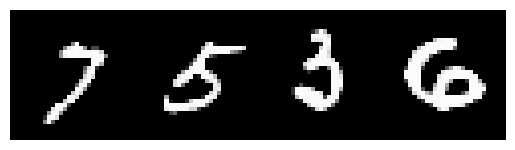

In [2]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
dataset = datasets.MNIST(root="dataset/", train=True, transform=transform, download=True)
loader = DataLoader(dataset, batch_size=4, shuffle=True)

def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis('off')
    plt.show()

for images, labels in loader:
    imshow(torchvision.utils.make_grid(images[:]))
    break


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([1, 28, 28])


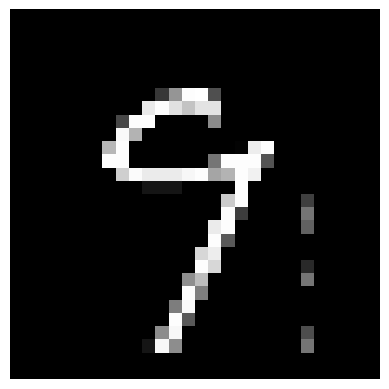

tensor([[[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1

In [3]:
for images, labels in loader:
    print(images[0].shape)
    imshow(torchvision.utils.make_grid(images[0]))
    print(images[0])
    break

Les images sont en réalités des vecteurs de dimensions 28*28. Le modèle va utiliser ces représentations vectorielles pour itérer sur les images. Chaque nombre représente la couleur du pixel (-1 désigne un pixel noir tandis que 1 désigne un pixel blanc). 
Les données d'entrainements sont des *digits* écrits à la main. Le modèle va ainsi s'entrainer à imiter des vrais données.

#### Le Générateur

Le générateur est un réseau de neuronne "basique" qui prends en entrée un vecteur de taille la dimension des images (ie le nombres de pixels, ici 28x28) 

In [4]:
class Generator(nn.Module):
    def __init__(self, z_dim, img_dim):
        super().__init__()
        self.gen = nn.Sequential(
            nn.Linear(z_dim, 256),
            nn.LeakyReLU(0.01),
            nn.Linear(256, img_dim),
            nn.Tanh(),  # normalize inputs to [-1, 1] so make outputs [-1, 1]
        )

    def forward(self, x):
        return self.gen(x)

In [5]:
z_dim = 64 # z correspond à la dimension du vecteur d'entrée du générateur
image_dim = 28 * 28 * 1  # Correspond à la dimension de sortie du générateur (et donc de la dimension d'entrée du discriminateur)
device = "cuda" if torch.cuda.is_available() else "cpu"
gen = Generator(z_dim, image_dim).to(device)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


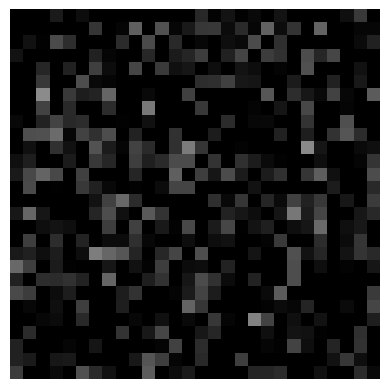

In [6]:
noise = torch.randn(1, z_dim).to(device)
fake = gen(noise)
imshow(torchvision.utils.make_grid(fake.cpu().detach().reshape(-1, 1, 28, 28)[:]))

In [7]:
fake.reshape(-1, 1, 28, 28)[:,:,1:3]

tensor([[[[-0.0928, -0.0160, -0.0450, -0.2351, -0.1840, -0.2234,  0.2109,
           -0.0151,  0.0232,  0.3743, -0.3198,  0.3203,  0.0247,  0.0992,
            0.2189,  0.2226,  0.0444,  0.1652,  0.0252,  0.3836,  0.0482,
            0.2025, -0.1057,  0.3889, -0.1093, -0.0540,  0.0263,  0.0265],
          [-0.0020,  0.0698,  0.0114,  0.2902,  0.1778, -0.2262, -0.0889,
           -0.0554,  0.1691, -0.1697,  0.2935, -0.0109,  0.1640, -0.0220,
            0.0277, -0.3775,  0.0584,  0.0371,  0.2961, -0.1429,  0.1851,
           -0.1392, -0.2483, -0.1057, -0.1264, -0.0427,  0.0397,  0.1307]]]],
       device='cuda:0', grad_fn=<SliceBackward0>)

Ici le générateur génère bien des données comprises entre -1 et 1 qu'on peut afficher sous forme d'image. Maintenant définission le discriminateur. Ce dernier est un réseau de neuronne qui prends en entrée les images (qu'elles soient fausses ou vraies) et ressort un nombre entre 0 et 1, qui représente la plausibilité de la donnée.

#### Le discriminateur

In [8]:
class Discriminator(nn.Module):
    def __init__(self, in_features):
        super().__init__()
        self.disc = nn.Sequential(
            nn.Linear(in_features, 128),
            nn.LeakyReLU(0.01),
            nn.Linear(128, 1),
            nn.Sigmoid(), # La fonction sigmoid permet de retourner un nombre entre 0 et 1
        )

    def forward(self, x):
        return self.disc(x)

In [9]:
disc = Discriminator(image_dim).to(device)
disc(fake).view(-1)

tensor([0.4977], device='cuda:0', grad_fn=<ViewBackward0>)

Ici le discriminateur (qui n'est pas encore entraîné) montre un score de 0.51 pour la fausse données (il aurait donc considérer que cette dernière est une vraie donnée). Comme le générateur s'entraîne lorsqu'il fausse le discriminateur, on entraîne plus régulièrement le discriminateur.

#### Entraînement du modèle

Maintenant on pour l'entraînement du modèle, 

In [10]:
from tqdm import trange

In [11]:
batch_size = 32
num_epochs = 30
lr = 3e-4
z_dim = 64
image_dim = 28 * 28 * 1

In [18]:
transforms = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,)),
    ]
)
dataset = datasets.MNIST(root="dataset/", transform=transforms, download=True)
loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
opt_disc = optim.Adam(disc.parameters(), lr=lr) # Choix de l'optimisateur, Adam pour les deux réseaux
opt_gen = optim.Adam(gen.parameters(), lr=lr)
criterion = nn.BCELoss()
num_epochs = 5
step = 0
k_disc = 1
for epoch in trange(num_epochs):
    for batch_idx, (real, _) in enumerate(loader):
        real = real.view(-1, 784).to(device) # On "aplatit" l'image
        batch_size = real.shape[0]

        ### Entrainement du discriminateur
        for _ in range(k_disc):  # k_disc est le nombre d'itérations pour entraîner le discriminateur avant de mettre à jour le générateur
            noise = torch.randn(batch_size, z_dim).to(device) # On génère un bruit à partir d'une loi gaussienne qui va servir d'input au générateur
            fake = gen(noise) # Le bruit permet que le générateur ne retourne pas tout le temps la même sortie
            disc_real = disc(real).view(-1)
            lossD_real = criterion(disc_real, torch.ones_like(disc_real)) # Calcul de la fonction de perte pour la vraie donnée
            disc_fake = disc(fake.detach()).view(-1)  # detach pour ne pas propager les gradients au générateur
            lossD_fake = criterion(disc_fake, torch.zeros_like(disc_fake)) # Calcul de la fonction de perte pour la fausse donnée
            lossD = (lossD_real + lossD_fake) / 2
            disc.zero_grad() # zero_grad() permet de réinitialiser le gradient à chaque étape
            lossD.backward() # On calcul les gradients
            opt_disc.step() # On actualise les poids

        ### Entrainement du générateur: max log(D(G(z)))
        noise = torch.randn(batch_size, z_dim).to(device)
        fake = gen(noise)
        output = disc(fake).view(-1)
        lossG = criterion(output, torch.ones_like(output))
        gen.zero_grad()
        lossG.backward()
        opt_gen.step()

        if batch_idx == 0:
            print(
                f"Epoch [{epoch}/{num_epochs}] Batch {batch_idx}/{len(loader)} \
                      Loss D: {lossD:.4f}, loss G: {lossG:.4f}"
            )
        step += 1

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch [0/5] Batch 0/1875                       Loss D: 0.6848, loss G: 1.3049


 20%|██        | 1/5 [00:22<01:31, 22.80s/it]

Epoch [1/5] Batch 0/1875                       Loss D: 0.7304, loss G: 0.6874


 40%|████      | 2/5 [00:44<01:05, 21.90s/it]

Epoch [2/5] Batch 0/1875                       Loss D: 0.6024, loss G: 0.8313


 60%|██████    | 3/5 [01:06<00:44, 22.19s/it]

Epoch [3/5] Batch 0/1875                       Loss D: 0.5980, loss G: 1.0365


 80%|████████  | 4/5 [01:29<00:22, 22.45s/it]

Epoch [4/5] Batch 0/1875                       Loss D: 0.5857, loss G: 1.1517


100%|██████████| 5/5 [01:52<00:00, 22.41s/it]


#### Génération de fausses images

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


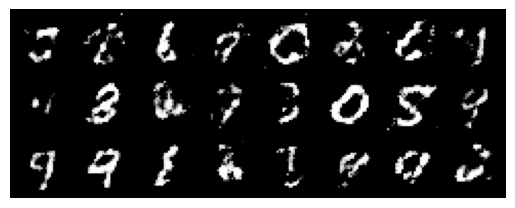

In [29]:
noise = torch.randn(24, z_dim).to(device)
fake = gen(noise)
imshow(torchvision.utils.make_grid(fake.cpu().detach().reshape(-1, 1, 28, 28)[:]))

#### Vraies images

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


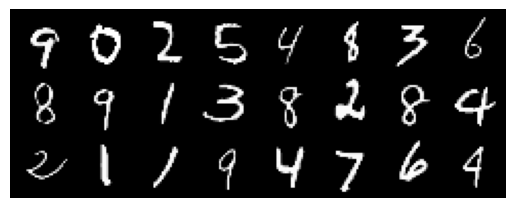

In [27]:
for images, labels in loader:
    imshow(torchvision.utils.make_grid(images[:24]))
    break